# Random Walk in one dimension

## Random Walker in one dimension

Importing modules

In [3]:
import math as m
import numpy as np
import numpy.random as r
import matplotlib.pyplot as plt
import matplotlib.animation as ani
# help(numpy.random)
#from IPython import display
#plt.rcParams['animation.ffmpeg_path'] = '/path_to_your/ffmpeg'

## 1. Random positions generation

In [12]:
events = int(1e3)
print("Number of events: {0}".format(events))
steps = r.choice((-1,1),events)

walker = np.cumsum(steps)

print("Maximum position of the walker is: {0}, reached at time {1},\nwhile the minimum is {2}, reached at time {3}".format(max(walker),np.argmax(walker),min(walker),np.argmin(walker)))
print("The walker reaches the position x=20 at times = {0}".format(np.where(walker == 20)))

Number of events: 1000
Maximum position of the walker is: 24, reached at time 259,
while the minimum is -11, reached at time 994
The walker reaches the position x=20 at times = (array([235, 255, 275, 305, 309, 313, 315, 319, 321, 667]),)


### Plotting results

#### Static plot

Plotting position of the walker in a static $(t,x)$ plot

Text(0.5, 1.0, 'Random Walker in 1D for 1000 steps')

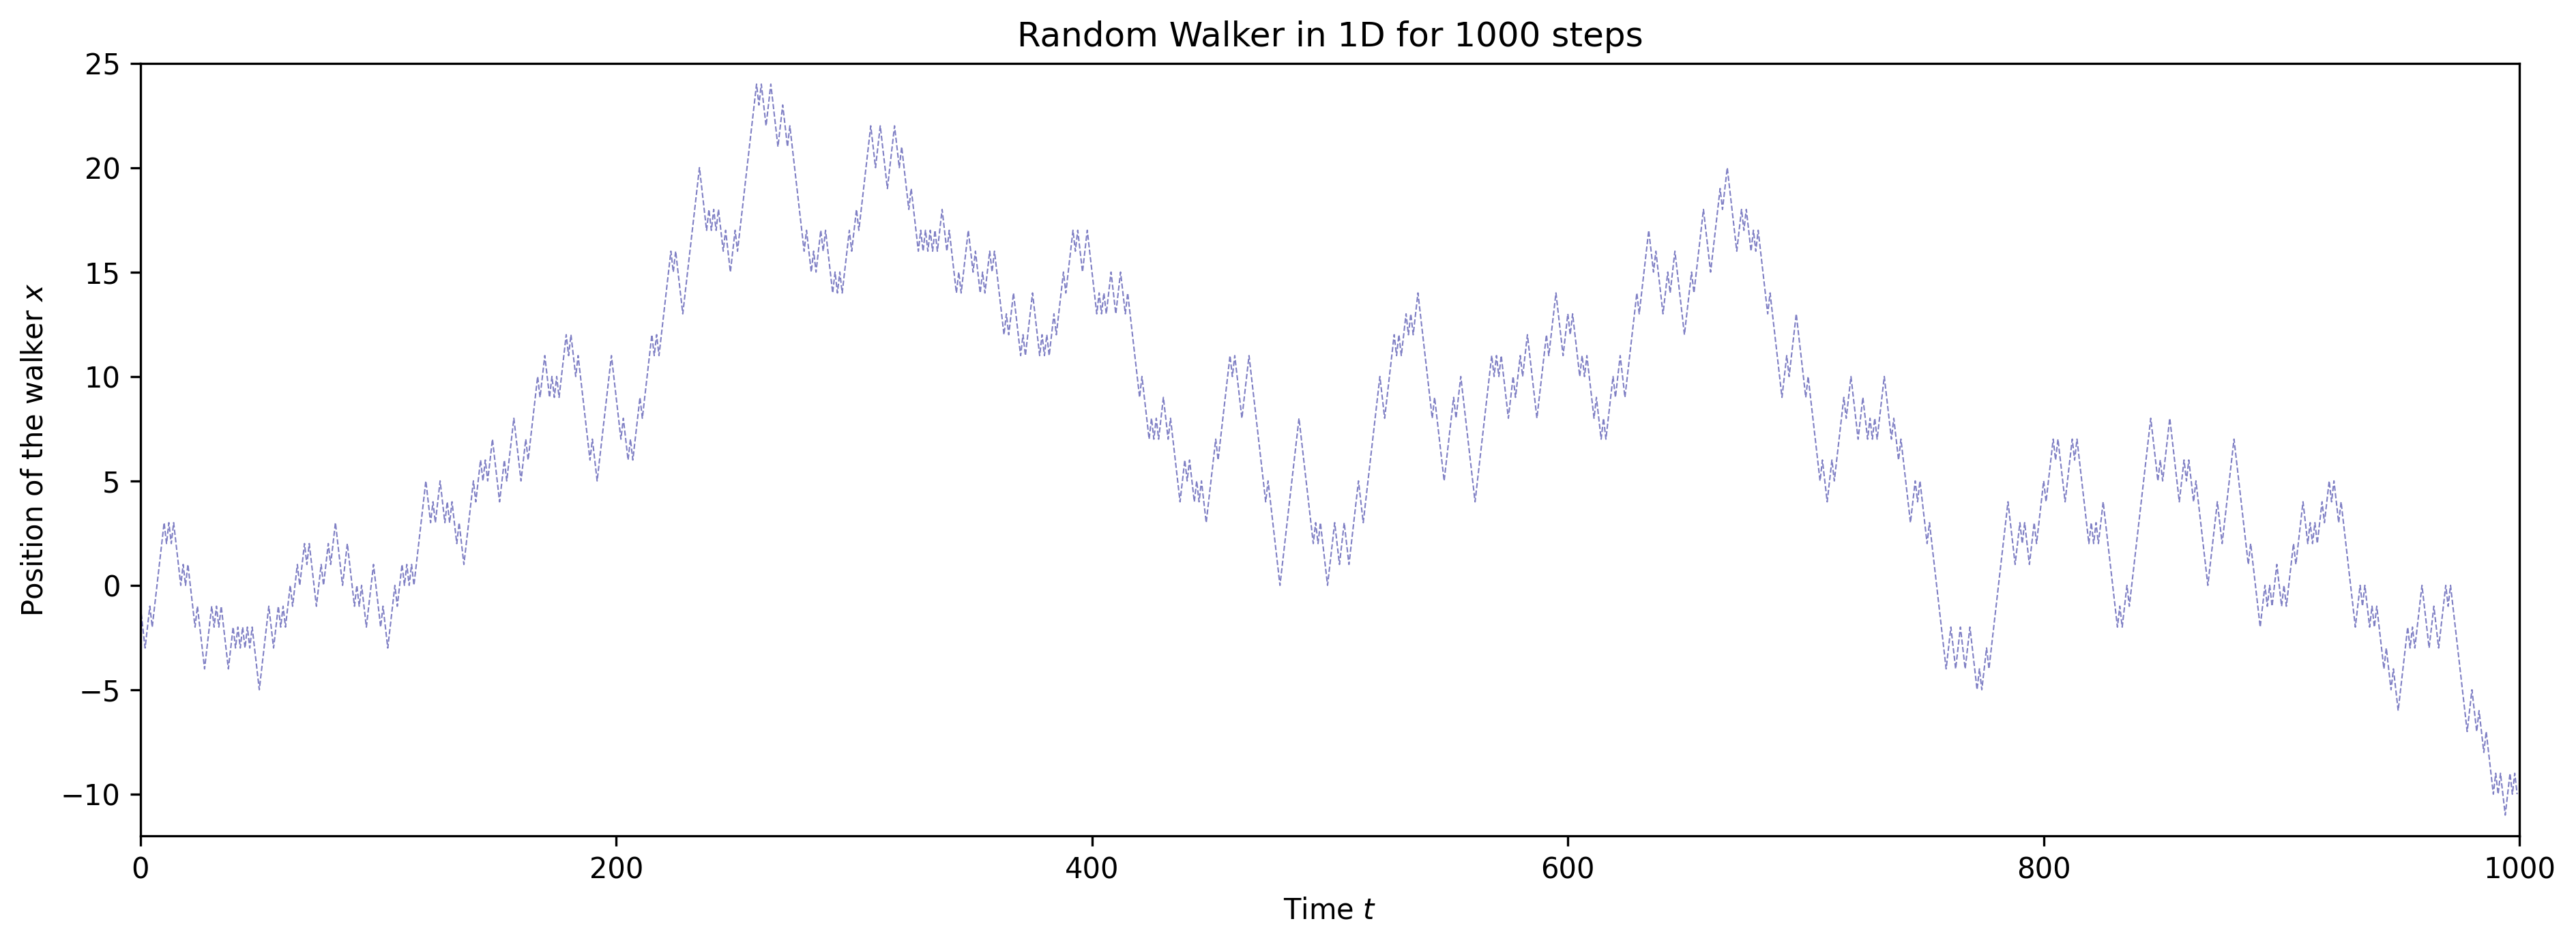

In [13]:
%matplotlib inline
fig = plt.figure(figsize=(15,5),dpi=300)
ax = fig.add_subplot(111, autoscale_on=False, xlim=(0, events), ylim=(min(walker)-1 ,max(walker)+1))
ax.set_xlabel("Time $t$")
ax.set_ylabel("Position of the walker $x$")
ax.plot(walker,'--',c='darkblue', alpha=0.5,lw=0.5)
plt.title("Random Walker in 1D for {0} steps".format(events))

#### Animated plot
First, we draw the initial state of plot, $(0,x(0))$, then, we generate the other subplots and at the end, animate them.

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
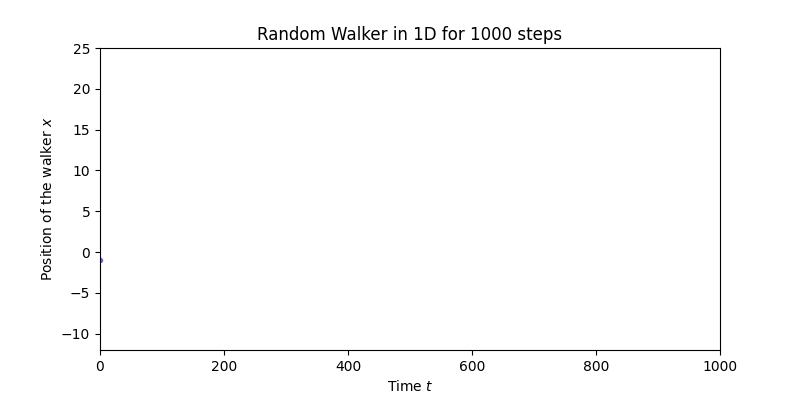

In [14]:
%matplotlib ipympl

times = np.arange(events)

# plot setup
fig = plt.figure(figsize=(8,4),dpi=100)
ax = fig.add_subplot(111, autoscale_on=False, xlim=(0, events), ylim=(min(walker)-1 ,max(walker)+1))
ax.set_xlabel("Time $t$")
ax.set_ylabel("Position of the walker $x$")
ax.set_title("Random Walker in 1D for {0} steps".format(events))
position, *_ = ax.plot(times[0], walker[0], '.', alpha=0.5, lw=0.8, color='mediumblue')
trajectory, *_ = ax.plot(times[0], walker[0], '--', alpha=0.5, lw=0.5, color='darkblue')

# functions that updates the plot at each time i
def update_plots(i):
    position.set_data(times[i], walker[i])
    trajectory.set_data(times[:i], walker[:i])
    # Return a tuple
    return position, trajectory

aniplot = ani.FuncAnimation(fig, update_plots, np.arange(1, events, 5), interval=5, blit=True, repeat=False)
plt.show()

## 2. Statistics on 1D Random Walker

The two following boxes should be runned if you want:
1. Random walkers those can be choose between $\pm 1$
2. The same of the point 1., within the overlay of a gaussian noise

#### Standard Random Walk

In [65]:
number_walkers = int(1e2)
positions2D = r.choice((-1,1),(events,number_walkers))

# positions of the walkers
walkers = np.cumsum(positions2D, axis = 0)

# max distances of each walker
max_distances = np.max(np.absolute(walkers), axis=0)
print("The walker gone further away in the x axis is the number {0}, with a distance of {1}".format(np.argmax(np.max(walkers,axis=0)), np.max(max_distances)))

The walker gone further away in the x axis is the number 97, with a distance of 75


#### Randow walk with noise

In [82]:
number_walkers = int(1e2)
positions2D = r.choice((-1,1),(events,number_walkers))

# gaussian noise generation
sigma = 0.05
noise = r.normal(0,sigma,events*number_walkers).reshape(events,number_walkers)

# positions of the walkers
walkers = np.cumsum(positions2D + noise, axis = 0)

# max distances of each walker
max_distances = np.max(np.absolute(walkers),axis=0)
print("The walker gone further away in the x axis is the number {0}, with a distance of {1}".format(np.argmax(np.max(walkers,axis=0)), np.max(max_distances)))

The walker gone further away in the x axis is the number 88, with a distance of 127.53705811095269


### Plotting maximum distances

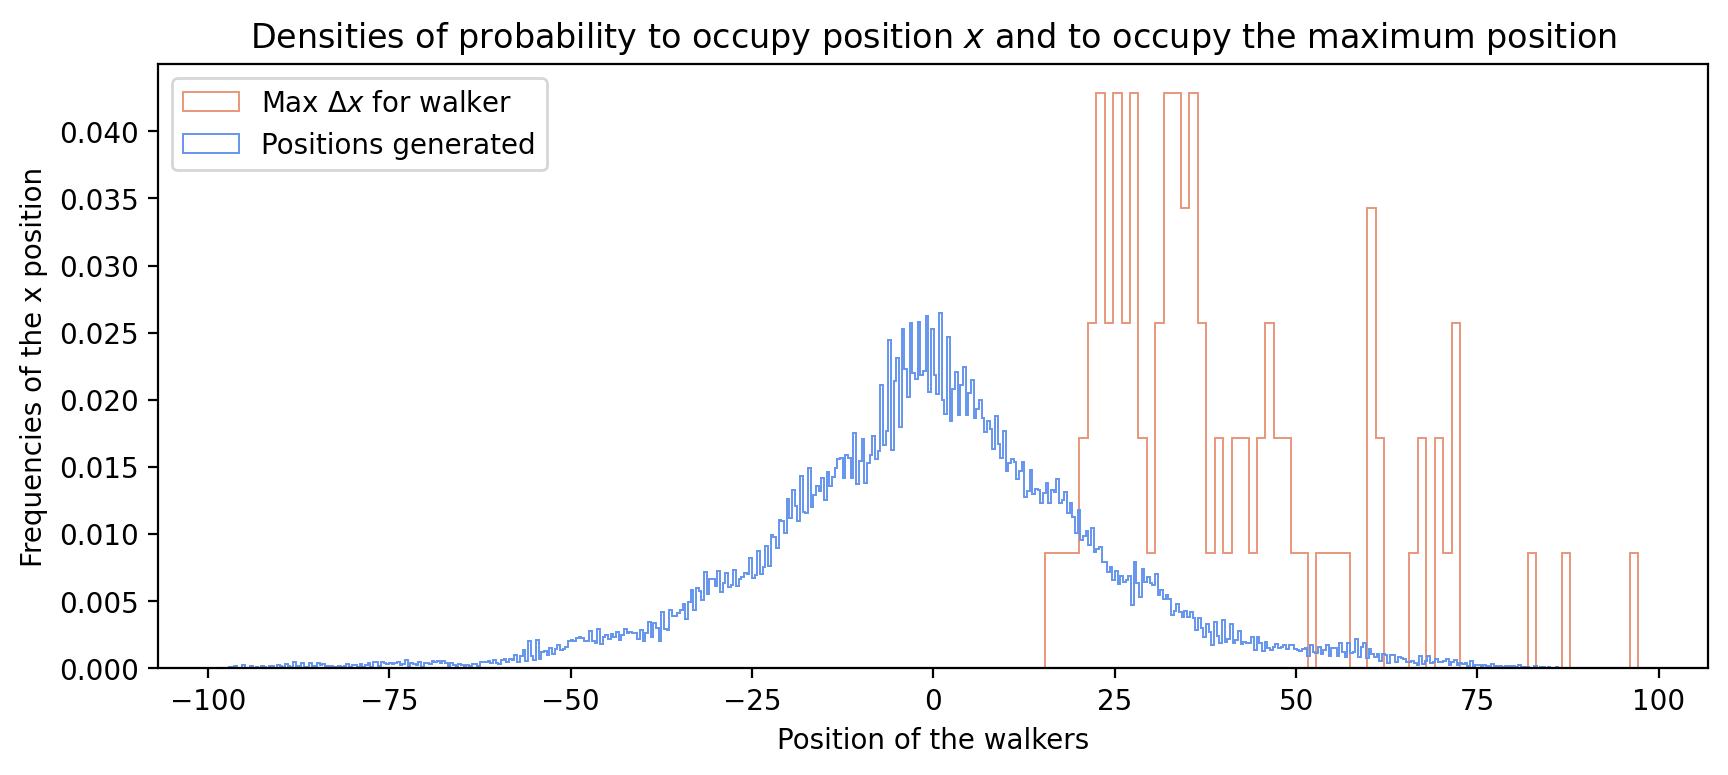

In [76]:
%matplotlib inline

fig = plt.figure(figsize=(10,4),dpi=200)
plt.hist(max_distances, bins=70, label="Max $\Delta x$ for walker", density=True, histtype ='step', color = 'darksalmon',lw=0.7)
plt.hist(walkers.flat, bins=500, label="Positions generated", histtype ='step', density=True, color = 'cornflowerblue',lw=0.7)
plt.xlabel("Position of the walkers")
plt.ylabel("Frequencies of the x position")
plt.title("Densities of probability to occupy position $x$ and to occupy the maximum position")
plt.legend(loc='upper left')

### Animated plot of a specific walker

The walker is the number 98


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
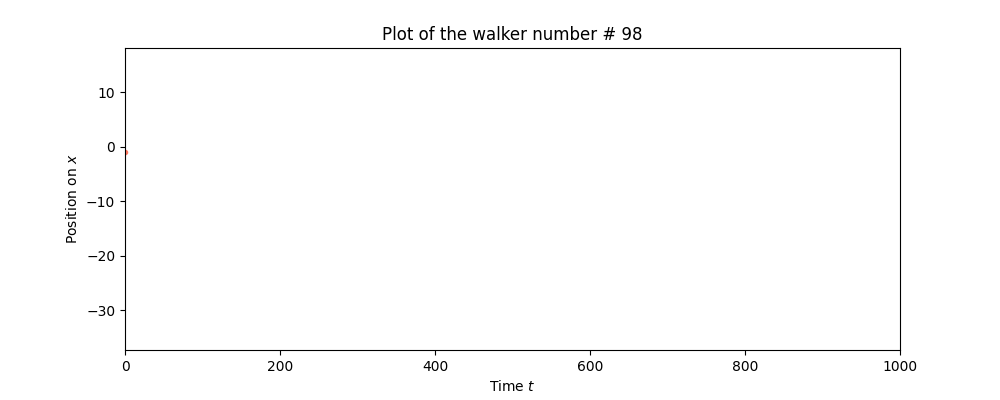

In [84]:
# we randomically choose a walker
identifier = r.choice(np.arange(number_walkers))
print("The walker is the number",identifier)

%matplotlib ipympl
fig = plt.figure(figsize=(10,4),dpi=100)
ax = fig.add_subplot(111, autoscale_on=False, xlim=(0, events), ylim=(min(walkers[:,identifier])-1 ,max(walkers[:,identifier])+1))
ax.set_title("Plot of the walker number # {0}".format(identifier))
ax.set_xlabel("Time $t$")
ax.set_ylabel("Position on $x$")

location, *_ = ax.plot(times[0], walker[0], '.', alpha=0.8, lw=2, color='tomato')
path, *_ = ax.plot(times[0], walker[0], '--', alpha=0.5, lw=0.5, color='coral')

def add_a_plot(i):
    location.set_data(times[i], walkers[i,identifier])
    path.set_data(times[:i], walkers[:i,identifier])
    # Return a tuple
    return location, path

anirandom = ani.FuncAnimation(fig, add_a_plot, np.arange(1, events,10), interval=30, blit=True, repeat=False)
plt.show()

### Plotting all walkers togheter

Static plot of paths superpostions

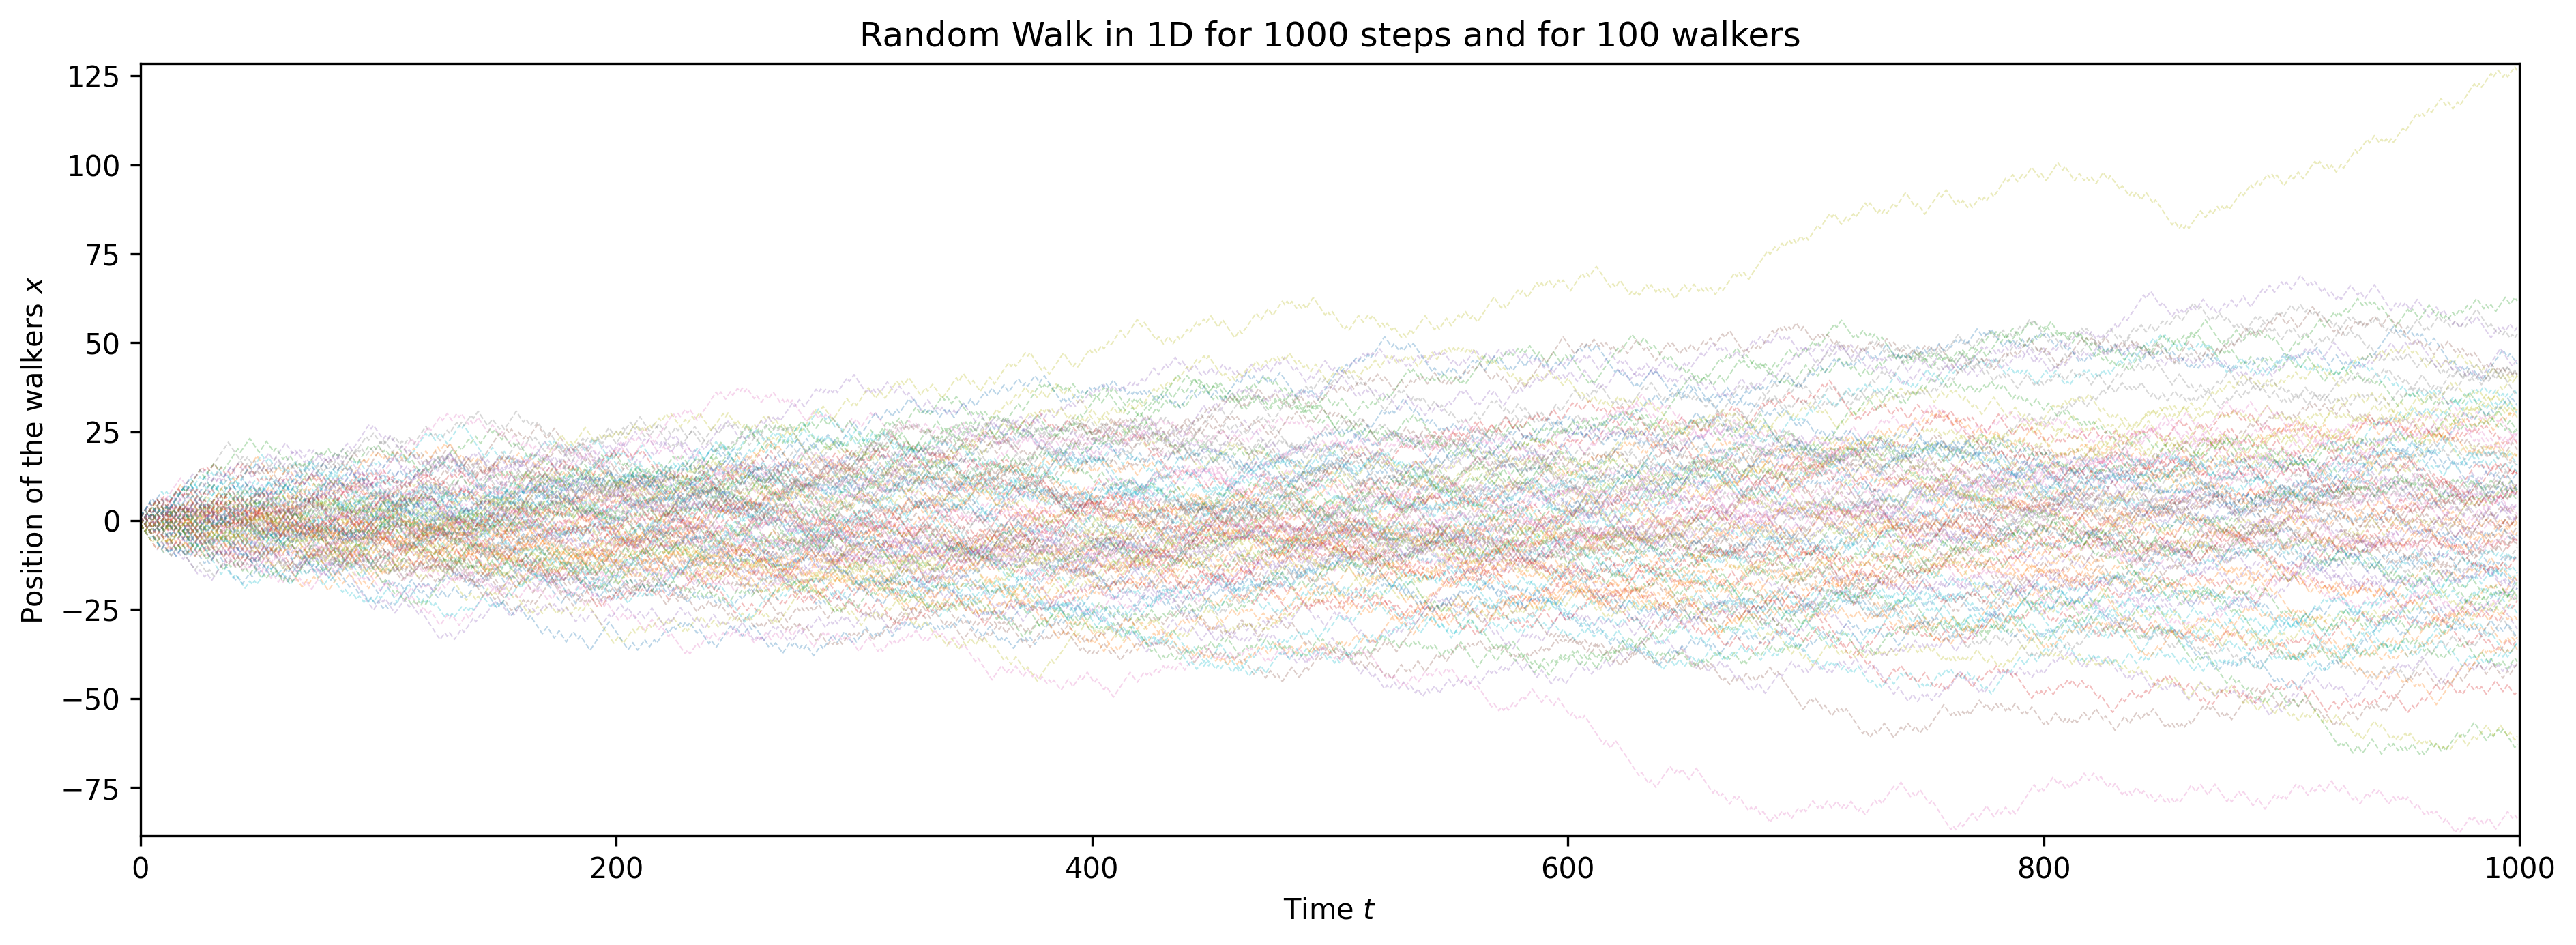

In [86]:
%matplotlib inline

fig = plt.figure(figsize=(15,5),dpi=300)

img = fig.add_subplot(111, autoscale_on=False, xlim=(0, events), ylim=(min(walkers.flat)-1, max(walkers.flat)+1))
img.set_xlabel("Time $t$")
img.set_ylabel("Position of the walkers $x$")
plt.title("Random Walk in 1D for {0} steps and for {1} walkers".format(events,number_walkers))
for i in np.arange(number_walkers):
    img.plot(walkers[:,i],'--', alpha=0.3, lw=0.5)

#### Animated plot of paths superposition
In this case the animations follows the time sequence

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
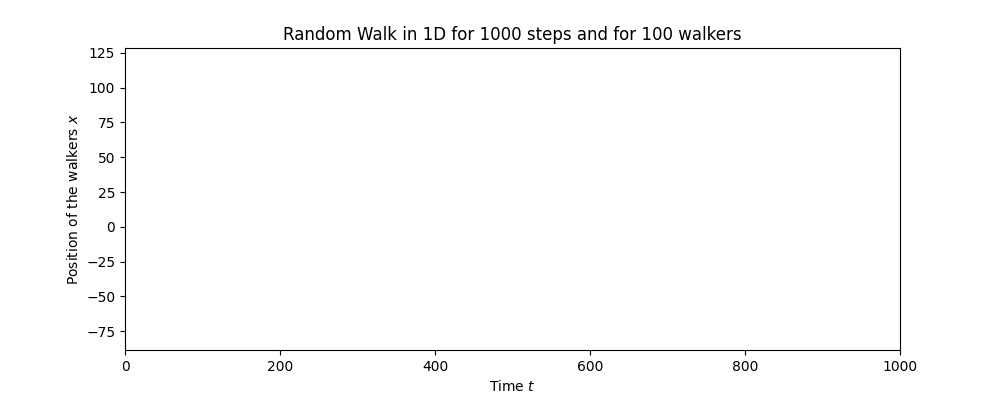

In [87]:
%matplotlib ipympl

times = np.arange(events)

# plot setup
fig = plt.figure(figsize=(10,4),dpi=100)
animated_figure = fig.add_subplot(111, autoscale_on=False, xlim=(0, events), ylim=(min(walkers.flat)-1 ,max(walkers.flat)+1))
animated_figure.set_xlabel("Time $t$")
animated_figure.set_ylabel("Position of the walkers $x$")
animated_figure.set_title("Random Walk in 1D for {0} steps and for {1} walkers".format(events,number_walkers))

trajectories = [ plt.plot([],[],'--', alpha=0.5, lw=0.2) [0] for i in  np.arange(number_walkers)]

def init():
    #init paths
    for path in trajectories:
        path.set_data([], [])
    return trajectories #return everything that must be updated

def update_plots(i):
    #animate lines
    for idx, path in enumerate(trajectories):
        path.set_data(times[:i], walkers[:i,idx])
    #animate rectangles
    return trajectories #return everything that must be updated

animation_walkers = ani.FuncAnimation(fig, update_plots, np.arange(1, events, 3), init_func=init, interval=10, blit=True, repeat=False)
plt.show()

#### Animated plot of paths superposition
In this case the animations follows the sequence of walkers index

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
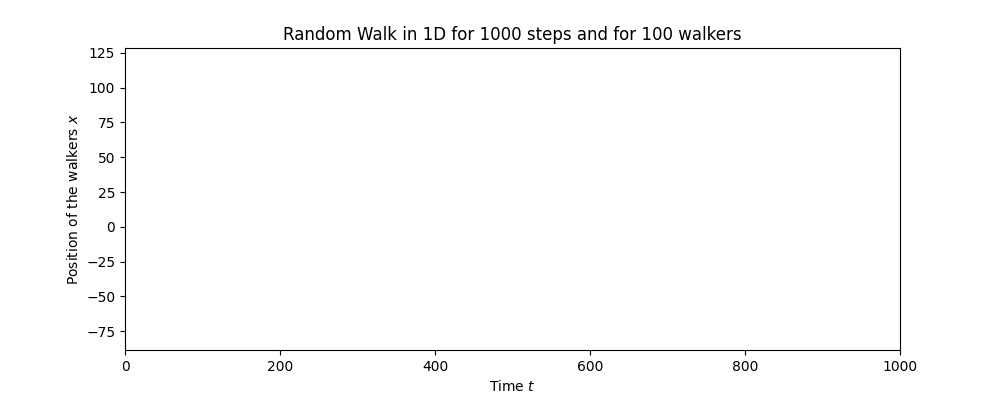

In [88]:
%matplotlib ipympl

times = np.arange(events)
players = np.arange(number_walkers)

# plot setup
fig = plt.figure(figsize=(10,4),dpi=100)
animated_figure = fig.add_subplot(111, autoscale_on=False, xlim=(0, events), ylim=(min(walkers.flat)-1 ,max(walkers.flat)+1))
animated_figure.set_xlabel("Time $t$")
animated_figure.set_ylabel("Position of the walkers $x$")
animated_figure.set_title("Random Walk in 1D for {0} steps and for {1} walkers".format(events,number_walkers))

trajectories = [plt.plot([],[],'--', alpha=0.5, lw=0.2) [0] for i in players]# plt.plot([times],[walkers[0,:]],'--', alpha=0.5, lw=0.2) ]

def init():
    #init paths
    trajectories[0].set_data([times],[walkers[:,0]])
    return trajectories #return everything that must be updated

def update_plots(i):
    trajectories[i].set_data([times],[walkers[:,i]])
    return trajectories #return everything that must be updated

animation_walkers = ani.FuncAnimation(fig, update_plots, frames=number_walkers, init_func=init, interval=10, blit=True, repeat=False)
plt.show()